<a href="https://colab.research.google.com/github/evennybo/AlgoTrade/blob/main/LSTM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:

# Set random seed for reproducibility
torch.manual_seed(0)

# Download historical data for Tesla from Yahoo Finance
data = yf.download('TSLA', start='2015-01-01', end='2018-03-31')

# Define the number of past days to use as input to the RNN
window_size = 60

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split the data into training and test sets
train_data = data_scaled[:-365]
test_data = data_scaled[-365:]

# Define a function to create input sequences for the RNN
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Create input sequences for the RNN
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
Epoch 100 Loss:  0.0002095969975925982
Epoch 200 Loss:  0.00014942236884962767
Epoch 300 Loss:  0.00011977041867794469
Epoch 400 Loss:  0.00010220604599453509
Epoch 500 Loss:  9.835608943831176e-05
Epoch 600 Loss:  0.0001947315759025514
Epoch 700 Loss:  7.582412217743695e-05
Epoch 800 Loss:  7.738053682260215e-05
Epoch 900 Loss:  6.78446886013262e-05
Epoch 1000 Loss:  6.636042962782085e-05
Test Loss:  0.0011351275024935603


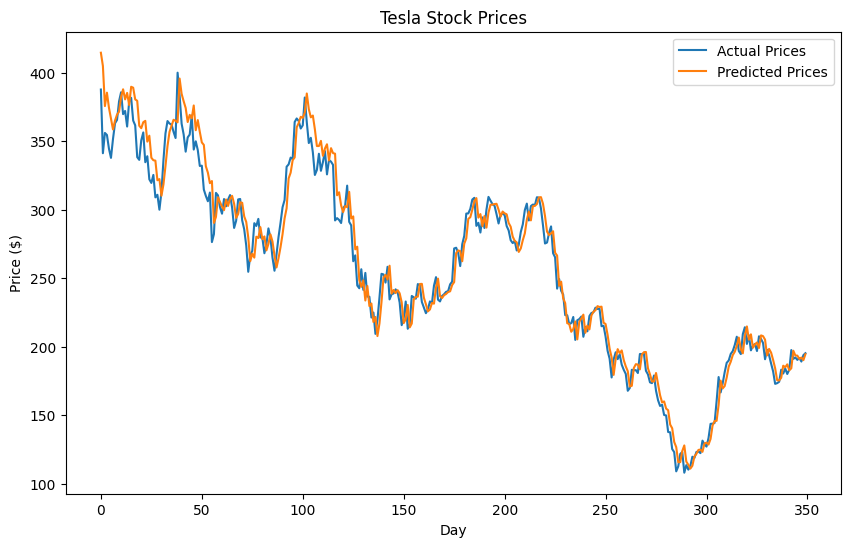

In [ ]:

# Set random seed for reproducibility
torch.manual_seed(0)

# Download historical data for Tesla from Yahoo Finance
data = yf.download('TSLA', start='2015-01-01', end='2023-03-31')

# Define the number of past days to use as input to the RNN
window_size = 15

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split the data into training and test sets
train_data = data_scaled[:-365]
test_data = data_scaled[-365:]

# Define a function to create input sequences for the RNN
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Create input sequences for the RNN
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
# Set the hyperparameters of the model
input_size = 1
hidden_size = 32
num_layers = 2
output_size = 1
learning_rate = 0.01
num_epochs = 1000

# Create the LSTM model
model = LSTM(input_size, hidden_size, num_layers, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch', epoch+1, 'Loss: ',loss.item())

# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print('Test Loss: ', test_loss.item())

    # Inverse transform the predictions and actual values
    test_outputs = scaler.inverse_transform(test_outputs.numpy())
    y_test = scaler.inverse_transform(y_test.numpy())

# Plot the predicted and actual prices

plt.figure(figsize=(10,6))

plt.plot(y_test, label='Actual Prices')
plt.plot(test_outputs, label='Predicted Prices')
plt.xlabel('Day')
plt.ylabel('Price ($)')
plt.title('Tesla Stock Prices')
plt.legend()
plt.show()

In [ ]:

# Set random seed for reproducibility
torch.manual_seed(0)

# Download historical data for Tesla from Yahoo Finance
data = yf.download('MSFT', start='2015-01-01', end='2018-03-31')

# Define the number of past days to use as input to the RNN
window_size = 60

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split the data into training and test sets
train_data = data_scaled[:-365]
test_data = data_scaled[-365:]

# Define a function to create input sequences for the RNN
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Create input sequences for the RNN
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

[*********************100%***********************]  1 of 1 completed


Epoch [100/500], Loss: 0.00039276169263757765
Epoch [200/500], Loss: 0.00024737408966757357
Epoch [300/500], Loss: 0.00019873333803843707
Epoch [400/500], Loss: 0.00019793469982687384
Epoch [500/500], Loss: 0.00019700087432283908
Test Loss: 0.0023


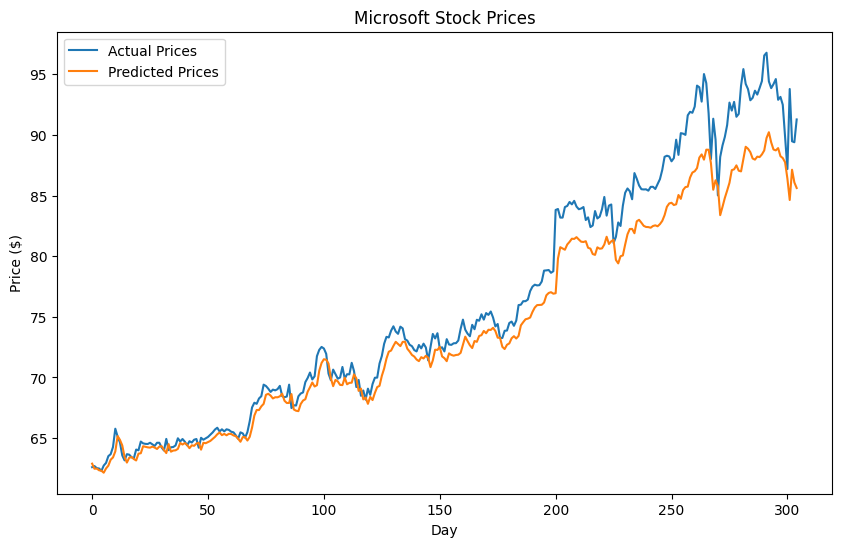

In [ ]:
# Set the hyperparameters of the model
input_size = 1
hidden_size = 32
num_layers = 2
output_size = 1
learning_rate = 0.01
num_epochs = 500

# Create the LSTM model
model = LSTM(input_size, hidden_size, num_layers, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch', epoch+1, 'Loss: ',loss.item())

# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print('Test Loss: ', test_loss.item())

    # Inverse transform the predictions and
    # Inverse transform the predictions and actual values
    test_outputs = scaler.inverse_transform(test_outputs.numpy())
    y_test = scaler.inverse_transform(y_test.numpy())

# Plot the predicted and actual prices

plt.figure(figsize=(10,6))

plt.plot(y_test, label='Actual Prices')
plt.plot(test_outputs, label='Predicted Prices')
plt.xlabel('Day')
plt.ylabel('Price ($)')
plt.title('Microsoft Stock Prices')
plt.legend()
plt.show()

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(0)

# Download historical data for Tesla from Yahoo Finance
data = yf.download('BTC-USD', start='2015-01-01', end='2018-03-31')

# Define the number of past days to use as input to the RNN
window_size = 60

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split the data into training and test sets
train_data = data_scaled[:-365]
test_data = data_scaled[-365:]

# Define a function to create input sequences for the RNN
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Create input sequences for the RNN
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

[*********************100%***********************]  1 of 1 completed


Epoch [100/500], Loss: 0.00017492625920567662
Epoch [200/500], Loss: 7.298753189388663e-05
Epoch [300/500], Loss: 2.1268101590976585e-06
Epoch [400/500], Loss: 2.0795121145056328e-06
Epoch [500/500], Loss: 2.0433656118257204e-06
Test Loss: 0.0489


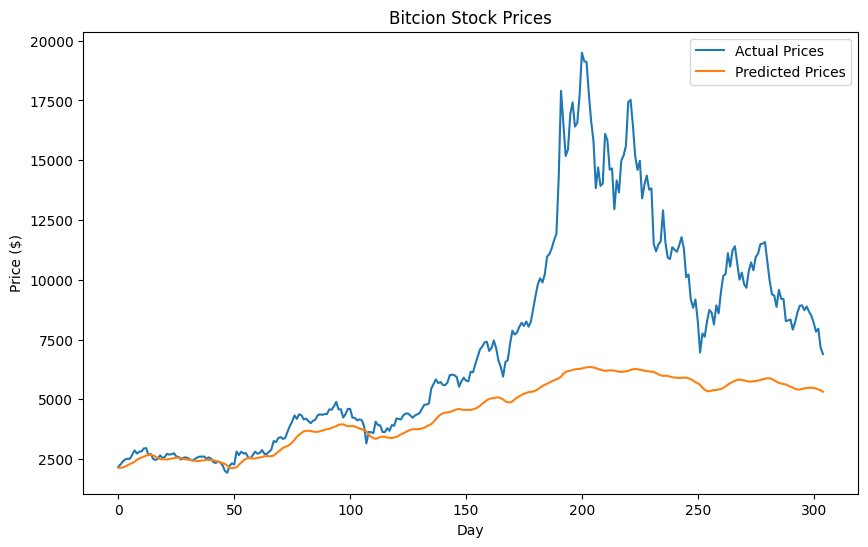

In [ ]:
# Set the hyperparameters of the model
input_size = 1
hidden_size = 32
num_layers = 2
output_size = 1
learning_rate = 0.01
num_epochs = 500

# Create the LSTM model
model = LSTM(input_size, hidden_size, num_layers, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

    # Inverse transform the predictions and
    # Inverse transform the predictions and actual values
    test_outputs = scaler.inverse_transform(test_outputs.numpy())
    y_test = scaler.inverse_transform(y_test.numpy())

# Plot the predicted and actual prices

plt.figure(figsize=(10,6))

plt.plot(y_test, label='Actual Prices')
plt.plot(test_outputs, label='Predicted Prices')
plt.xlabel('Day')
plt.ylabel('Price ($)')
plt.title('Bitcion Stock Prices')
plt.legend()
plt.show()

In [ ]:
import yfinance as yf
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# download stock data
data = yf.download('TSLA', start='2015-01-01', end='2021-12-31')

# select 'Close' column as the target variable
target_col = 'Close'
target = data[target_col].values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler()
target = scaler.fit_transform(target)

# split the data into training and test sets
train_size = int(len(target) * 0.8)
train_data = target[:train_size]
test_data = target[train_size:]

# define function to create input/output sequences
def prepare_data(data, seq_len):
    X, Y = [], []
    for i in range(len(data)-seq_len):
        X.append(data[i:i+seq_len])
        Y.append(data[i+seq_len])
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

# define sequence length
seq_len = 20

# create training and test sequences
x_train, y_train = prepare_data(train_data, seq_len)
x_test, y_test = prepare_data(test_data, seq_len)

# create the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# define hyperparameters
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2
learning_rate = 0.001
num_epochs = 100

# create model instance
model = RNN(input_size, hidden_size, output_size, num_layers).to(device)

# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train the model
for epoch in range(num_epochs):
    optimizer.zero_grad()
    x_train = torch.tensor(x_train, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# test the model
with torch.no_grad():
    x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test, dtype=torch.float32).to(device)
    output = model(x_test)
    test_loss = criterion(output, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# inverse transform the predictions
y_pred = scaler.inverse_transform(output.cpu().detach().numpy())


[*********************100%***********************]  1 of 1 completed


<ipython-input-3-d40677501eb7>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32).to(device)
<ipython-input-3-d40677501eb7>:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).to(device)


Epoch [10/100], Loss: 0.0018
Epoch [20/100], Loss: 0.0014
Epoch [30/100], Loss: 0.0012
Epoch [40/100], Loss: 0.0010
Epoch [50/100], Loss: 0.0008
Epoch [60/100], Loss: 0.0005
Epoch [70/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000
Test Loss: 0.0105


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
import yfinance as yf
import ta

# download the dataset
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2022-04-22"
data = yf.download(ticker, start=start_date, end=end_date)

# calculate technical indicators
data = ta.add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")

# select the relevant features
cols = ['Close', 'volume_adi', 'momentum_rsi', 'volatility_bbh', 'volatility_bbl']
dataset = data[cols]

# convert the dataset to a numpy array
data = dataset.values

# scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# create a function to split the data into training and testing sets
def create_dataset(data, look_back=1, look_forward=1):
    X, Y = [], []
    for i in range(len(data)-look_back-look_forward+1):
        X.append(data[i:(i+look_back), :])
        Y.append(data[(i+look_back):(i+look_back+look_forward), 0])
    return np.array(X), np.array(Y)

# split the data into training and testing sets
look_back = 60
look_forward = 10
X_train, Y_train = create_dataset(scaled_data, look_back, look_forward)
X_test, Y_test = create_dataset(scaled_data, look_back, look_forward)

# reshape the data for RNN model input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# create the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(100))
model.add(Dropout(0.2))
model.add(Dense(look_forward))
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# invert the scaling
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test)

# calculate the root mean squared error (RMSE)
train_score = np.sqrt(np.mean(np.power((Y_train - train_predict),2)))
print('Train RMSE: ', train_score)
test_score = np.sqrt(np.mean(np.power((Y_test - test_predict),2)))
print('Test RMSE: ', test_score)